# 分割切片可视化
---
> 推理结果，对比可视化

## 迭代器读取nii文件


In [1]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm

# 定义颜色列表
colors = ['black', 'red', 'blue', 'green']  # 0: 白色, 1: 红色, 2: 绿色, 3: 蓝色

# 创建 colormap
custom_cmap = ListedColormap(colors)

# 定义边界
bounds = [0, 1, 2, 3, 4]  # 边界用于将数值映射到颜色
norm = BoundaryNorm(bounds, custom_cmap.N)

# 创建 colormap
# custom_cmap = LinearSegmentedColormap('CustomMap', cdict)

path = {
    'flair': '/root/workspace/VoxelMedix/output/UXNET/13-20-05/P2/P2_test_input_flair.nii.gz',
    
    't1':   '/root/workspace/VoxelMedix/output/UXNET/13-20-05/P2/P2_test_input_t1.nii.gz',
    
    't2':  '/root/workspace/VoxelMedix/output/UXNET/13-20-05/P2/P2_test_input_t2.nii.gz',
    
    't1ce': '/root/workspace/VoxelMedix/output/UXNET/13-20-05/P2/P2_test_input_t1ce.nii.gz',
    
    'mask': '/root/workspace/VoxelMedix/output/UXNET/13-20-05/P2/P2_test_input_mask.nii.gz',
    
    'pred': '/root/workspace/VoxelMedix/output/UXNET/13-20-05/P2/P2_test_pred.nii.gz'
}


data_ndarray = nib.load(path['mask']).get_fdata()

data_ndarray.shape

(240, 240, 155)

In [5]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def get_paths_dict(patient_dir: str) -> dict:
    """
    获取患者目录下的所有文件路径，并按模态分类。
    """
    paths_dict = {}
    filenames = os.listdir(patient_dir)
    
    for filename in filenames:
        if not filename.endswith('.nii.gz'):  # 确保文件是 NIfTI 格式
            continue
        modal = filename.split('.')[0].split('_')[-1]
        path = os.path.join(patient_dir, filename)
        paths_dict[modal] = path
    
    return paths_dict

def get_data_dict(paths_dict: dict) -> dict:
    """
    加载所有模态的数据。
    """
    data_dict = {}
    
    for modal, path in paths_dict.items():
        if not os.path.exists(path):  # 检查文件是否存在
            raise FileNotFoundError(f"File not found: {path}")
        data_ndarray = nib.load(path).get_fdata()
        data_dict[modal] = data_ndarray
    
    return data_dict

def get_slice_dict(data_dict: dict, slice_num: int) -> tuple:
    """
    提取指定切片的原始图像、真实掩膜和预测结果，并生成子区域的掩膜和预测结果。
    """
    sub_areas = ['ET', 'TC', 'WT']
    slices = {}
    subarea_slice_mask = {}
    subarea_slice_pred = {}

    # 提取原始图像、真实掩膜和预测结果
    slices['original'] = data_dict['t1'][:, :, slice_num]
    slices['mask'] = data_dict['mask'][:, :, slice_num]
    slices['pred'] = data_dict['pred'][:, :, slice_num]  # 修正：从 pred 中提取

    # 生成子区域的掩膜和预测结果
    for label, sub_area in enumerate(sub_areas):
        subarea_slice_mask[f'{sub_area} on Mask'] = np.where(slices['mask'] == label + 1, label + 1, 0)
        subarea_slice_pred[f'{sub_area} on Pred'] = np.where(slices['pred'] == label + 1, label + 1, 0)

    return slices, subarea_slice_mask, subarea_slice_pred

def _plot_slice(ax, original: np.ndarray, overlay: np.ndarray, title: str, cmap_overlay: str = 'cool', alpha: float = 0.5):
    """
    辅助函数：绘制原始图像和叠加的掩膜。
    """
    ax.imshow(original, cmap='bone')
    ax.imshow(np.ma.masked_where(overlay == 0, overlay), cmap=cmap_overlay, alpha=alpha)
    ax.set_title(title, fontsize=30)
    ax.axis('off')

def show_mapped_slice_mask_to_data(slices: dict, addition: str):
    """
    显示真实掩膜和预测结果的对比图。
    """
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    
    # 绘制真实掩膜
    _plot_slice(axs[0], slices['original'], slices['mask'], 'Ground Truth')
    
    # 绘制预测结果
    _plot_slice(axs[1], slices['original'], slices['pred'], f'Prediction on {addition}')
    
    plt.tight_layout()
    plt.show()

# def show_slice_dict(single_slices: dict, mask_slice_dict: dict, cmap: str = 'bone', addition: str = 'UNet'):
#     """
#     显示多个子区域的分割结果。
#     """
#     fig, axs = plt.subplots(1, len(mask_slice_dict), figsize=(10 * len(mask_slice_dict), 10))
    
#     for i, (title, mask_slice) in enumerate(mask_slice_dict.items()):
#         _plot_slice(axs[i], single_slices['original'], mask_slice, f'{addition}: {title}', cmap_overlay='magma', alpha=1)
    
#     plt.tight_layout()
#     plt.show()

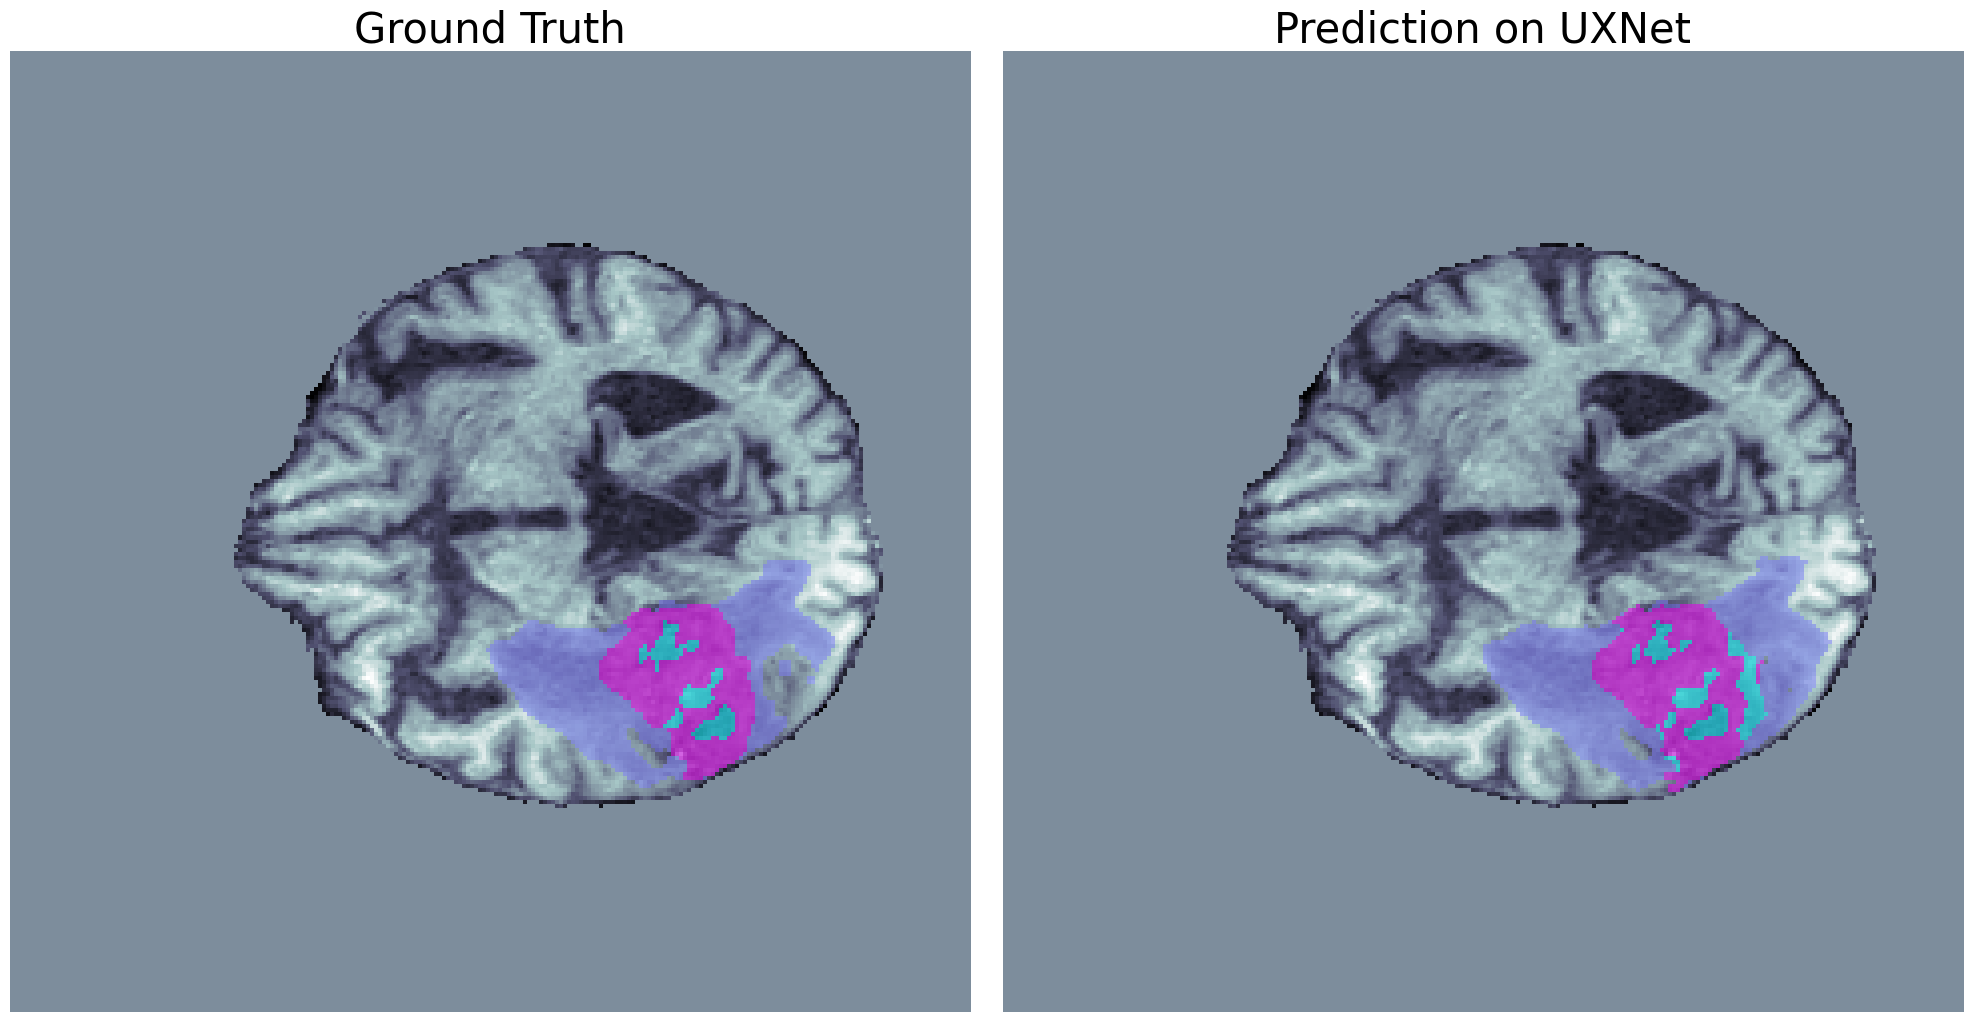

In [6]:
patient_dir = '/root/workspace/VoxelMedix/output/UXNET/13-20-05/P1'
paths_dict = get_paths_dict(patient_dir)
data_dict = get_data_dict(paths_dict)
slices, _, _ = get_slice_dict(data_dict, 60)

show_mapped_slice_mask_to_data(slices, addition='UXNet')

In [217]:

paths_dict

{'t1ce': '/root/workspace/VoxelMedix/output/UXNET/13-20-05/P1/P1_test_input_t1ce.nii.gz',
 'pred': '/root/workspace/VoxelMedix/output/UXNET/13-20-05/P1/P1_test_pred.nii.gz',
 'flair': '/root/workspace/VoxelMedix/output/UXNET/13-20-05/P1/P1_test_input_flair.nii.gz',
 't2': '/root/workspace/VoxelMedix/output/UXNET/13-20-05/P1/P1_test_input_t2.nii.gz',
 't1': '/root/workspace/VoxelMedix/output/UXNET/13-20-05/P1/P1_test_input_t1.nii.gz',
 'mask': '/root/workspace/VoxelMedix/output/UXNET/13-20-05/P1/P1_test_input_mask.nii.gz'}

In [258]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def get_paths_dict(patient_dir: str) -> dict:
    """
    获取患者目录下的所有文件路径，并按模态分类。
    """
    paths_dict = {}
    filenames = os.listdir(patient_dir)
    
    for filename in filenames:
        if not filename.endswith('.nii.gz'):  # 确保文件是 NIfTI 格式
            continue
        modal = filename.split('.')[0].split('_')[-1]
        path = os.path.join(patient_dir, filename)
        paths_dict[modal] = path
    
    return paths_dict

def get_data_dict(paths_dict: dict) -> dict:
    """
    加载所有模态的数据。
    """
    data_dict = {}
    
    for modal, path in paths_dict.items():
        if not os.path.exists(path):  # 检查文件是否存在
            raise FileNotFoundError(f"File not found: {path}")
        data_ndarray = nib.load(path).get_fdata()
        data_dict[modal] = data_ndarray
    
    return data_dict

def get_slice_dict(data_dict: dict, slice_num: int) -> tuple:
    """
    提取指定切片的原始图像、真实掩膜和预测结果，并生成子区域的掩膜和预测结果。
    """
    sub_areas = ['ET', 'TC', 'WT']
    slices = {}
    subarea_slice_mask = {}
    subarea_slice_pred = {}

    # 提取原始图像、真实掩膜和预测结果
    slices['original'] = data_dict['t1'][:, :, slice_num]
    slices['mask'] = data_dict['mask'][:, :, slice_num]
    slices['pred'] = data_dict['pred'][:, :, slice_num]  # 修正：从 pred 中提取

    # 生成子区域的掩膜和预测结果
    for label, sub_area in enumerate(sub_areas):
        subarea_slice_mask[f'{sub_area} on Mask'] = np.where(slices['mask'] == label + 1, label + 1, 0)
        subarea_slice_pred[f'{sub_area} on Pred'] = np.where(slices['pred'] == label + 1, label + 1, 0)

    return slices, subarea_slice_mask, subarea_slice_pred

def _plot_slice(ax, original: np.ndarray, overlay: np.ndarray, title: str, cmap_overlay: str = 'cool', alpha: float = 0.5):
    """
    辅助函数：绘制原始图像和叠加的掩膜。
    """
    ax.imshow(original, cmap='bone')
    ax.imshow(np.ma.masked_where(overlay == 0, overlay), cmap=cmap_overlay, alpha=alpha)
    ax.set_title(title, fontsize=30)
    ax.axis('off')

def show_mapped_slice_mask_to_data(slices: dict, addition: str):
    """
    显示真实掩膜和预测结果的对比图。
    """
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    
    # 绘制真实掩膜
    _plot_slice(axs[0], slices['original'], slices['mask'], 'Ground Truth')
    
    # 绘制预测结果
    _plot_slice(axs[1], slices['original'], slices['pred'], f'Prediction on {addition}')
    
    plt.tight_layout()
    plt.savefig(f'./{addition}_prediction.png')
    plt.show()

def show_slice_dict(single_slices: dict, mask_slice_dict: dict, cmap: str = 'bone', addition: str = 'UNet'):
    """
    显示多个子区域的分割结果。
    """
    fig, axs = plt.subplots(1, len(mask_slice_dict), figsize=(10 * len(mask_slice_dict), 10))
    
    for i, (title, mask_slice) in enumerate(mask_slice_dict.items()):
        _plot_slice(axs[i], single_slices['original'], mask_slice, f'{addition}: {title}', cmap_overlay='magma', alpha=1)
    
    plt.tight_layout()
    plt.show()

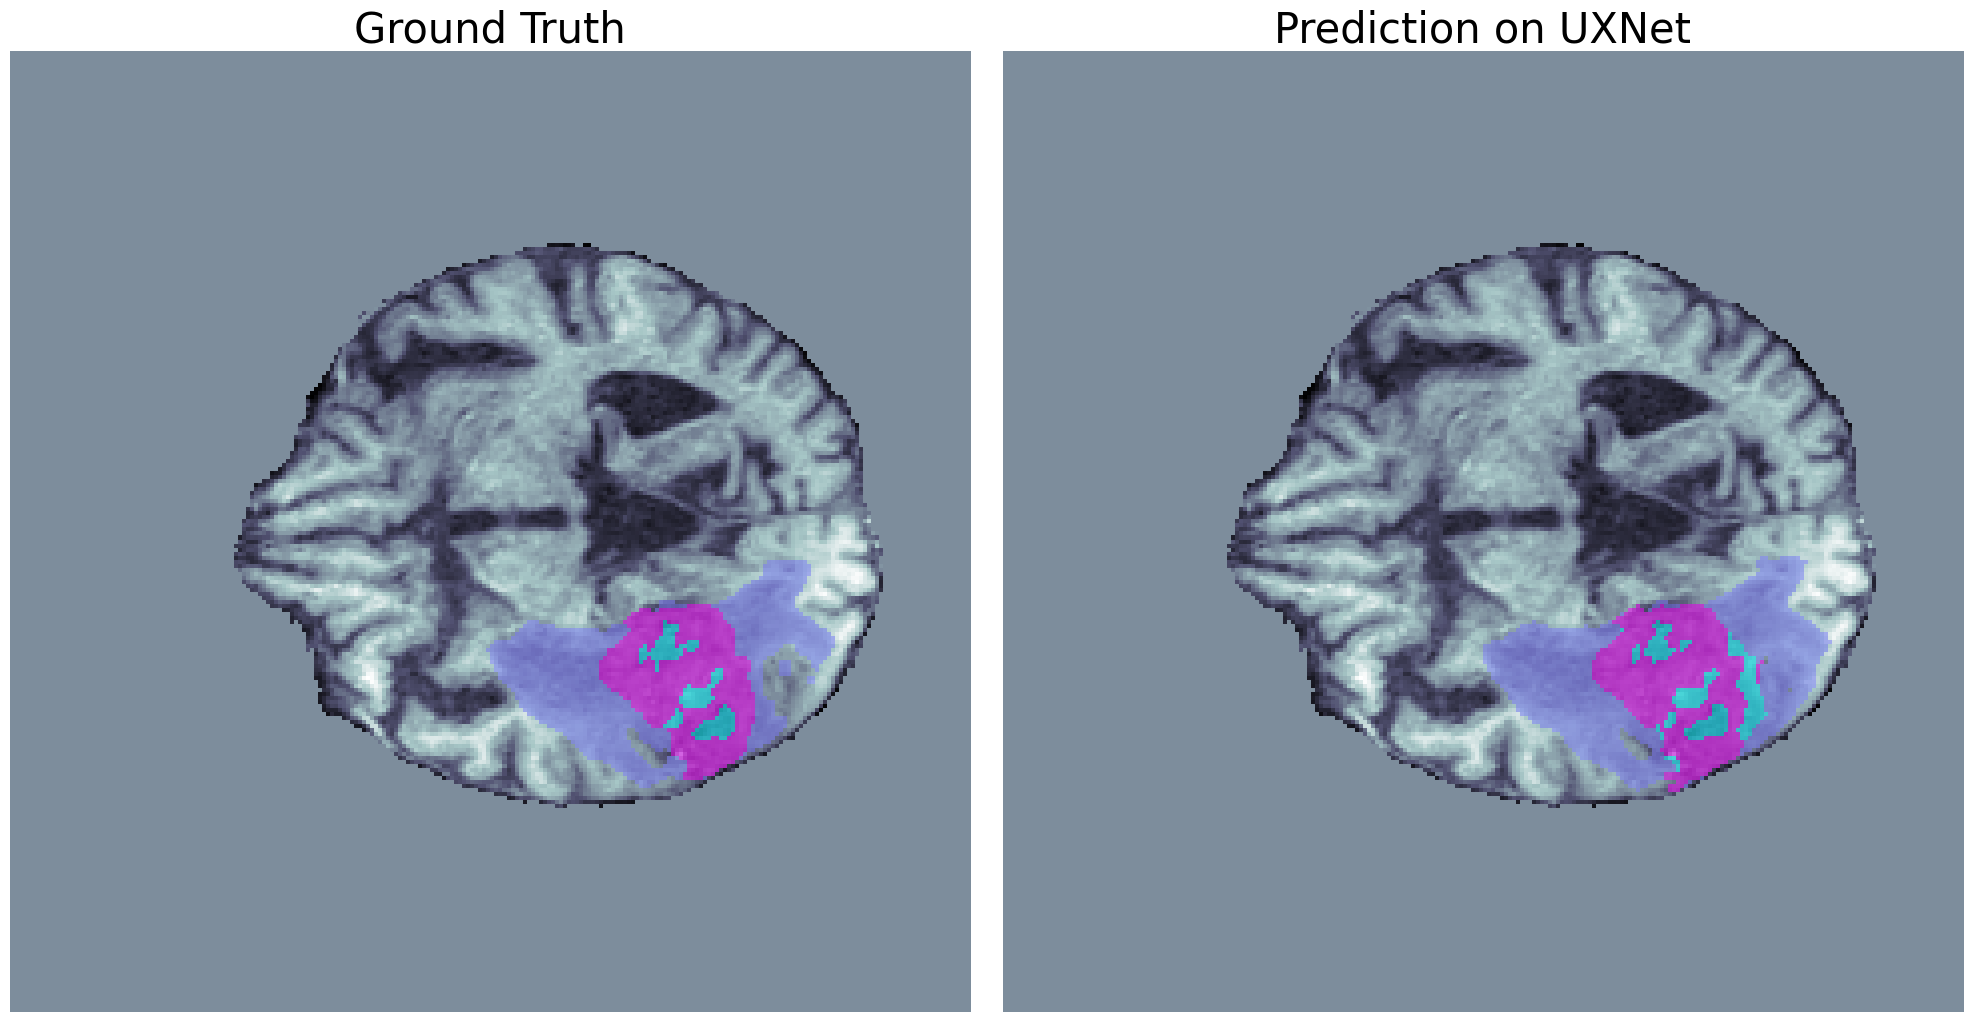

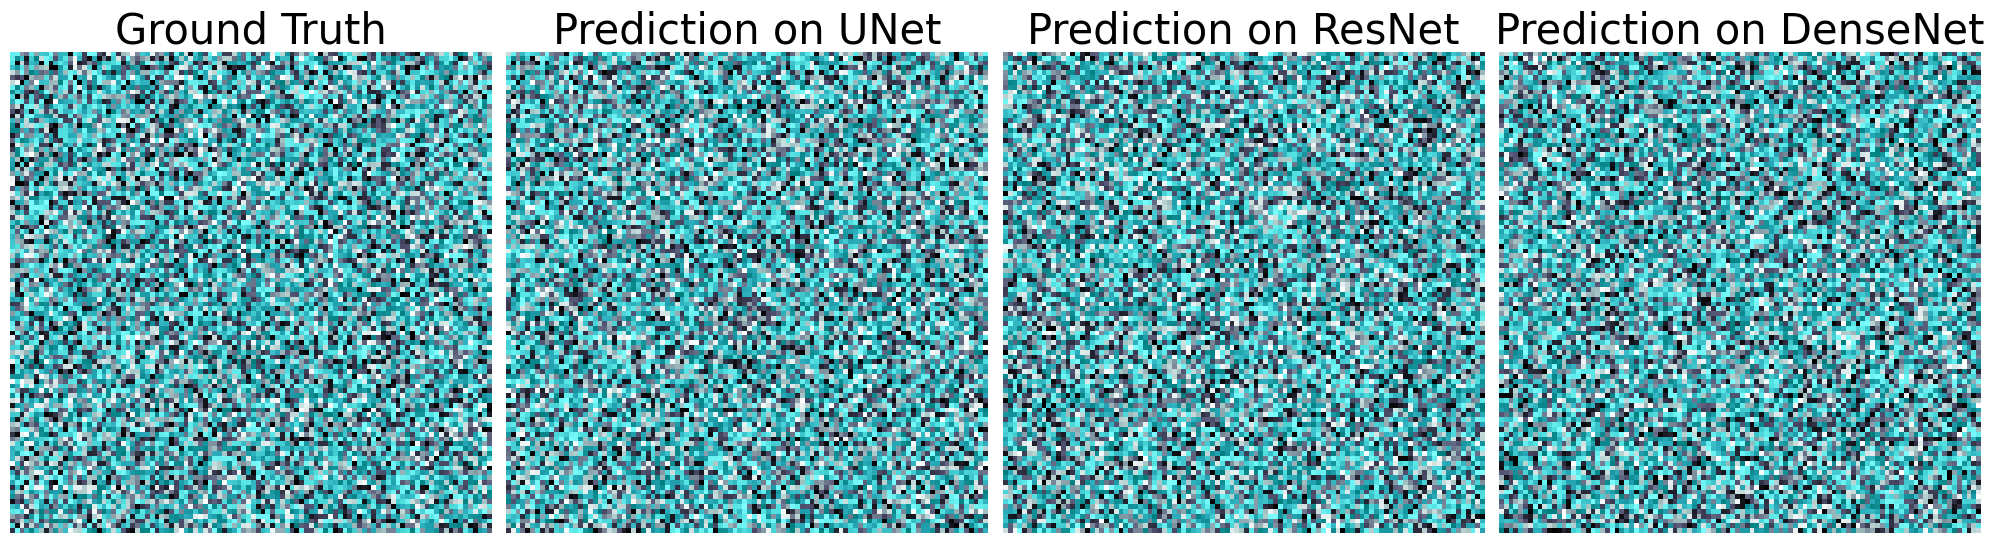

In [7]:
import matplotlib.pyplot as plt

def show_mapped_slice_mask_to_data(slices_list: list, addition_list: list):
    """
    显示多个网络的真实掩膜和预测结果的对比图。
    
    参数:
    slices_list: 包含多个字典的列表，每个字典表示一个网络的输出结果。
    addition_list: 包含每个网络名称的列表，用于标题显示。
    """
    num_networks = len(slices_list)
    fig, axs = plt.subplots(1, num_networks + 1, figsize=(20, 10))  # +1 用于显示真实掩膜
    
    # 绘制真实掩膜
    _plot_slice(axs[0], slices_list[0]['original'], slices_list[0]['mask'], 'Ground Truth')
    
    # 绘制每个网络的预测结果
    for i, (slices, addition) in enumerate(zip(slices_list, addition_list)):
        _plot_slice(axs[i + 1], slices['original'], slices['pred'], f'Prediction on {addition}')
    
    plt.tight_layout()
    plt.show()

# 示例数据
slices_list = [
    {
        'original': np.random.rand(100, 100),  # 示例原始图像
        'mask': np.random.choice([0, 1], size=(100, 100)),  # 示例真实掩膜
        'pred': np.random.choice([0, 1], size=(100, 100))   # 示例预测结果1
    },
    {
        'original': np.random.rand(100, 100),  # 示例原始图像
        'mask': np.random.choice([0, 1], size=(100, 100)),  # 示例真实掩膜
        'pred': np.random.choice([0, 1], size=(100, 100))   # 示例预测结果2
    },
    {
        'original': np.random.rand(100, 100),  # 示例原始图像
        'mask': np.random.choice([0, 1], size=(100, 100)),  # 示例真实掩膜
        'pred': np.random.choice([0, 1], size=(100, 100))   # 示例预测结果3
    }
]

addition_list = ['UNet', 'ResNet', 'DenseNet']

# 调用函数显示结果
show_mapped_slice_mask_to_data(slices_list, addition_list)

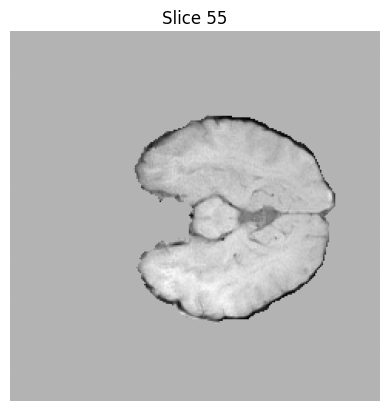

In [224]:
import nibabel as nib
import matplotlib.pyplot as plt
from monai.visualize import matshow3d

# 加载 NIfTI 文件
nii_img = nib.load('/root/workspace/VoxelMedix/output/UXNET/13-20-05/P2/P2_test_input_t1.nii.gz')
data = nii_img.get_fdata()

# 可视化中间切片
slice_idx = 55
plt.imshow(data[:, :, slice_idx], cmap='gray')
plt.title(f'Slice {slice_idx}')
plt.axis('off')
plt.show()




(<Figure size 1000x1000 with 1 Axes>,
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan,  0.,  0., ...,  0.,  0., nan],
        [nan,  0.,  0., ...,  0.,  0., nan],
        ...,
        [nan,  0.,  0., ...,  0.,  0., nan],
        [nan,  0.,  0., ...,  0.,  0., nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32))

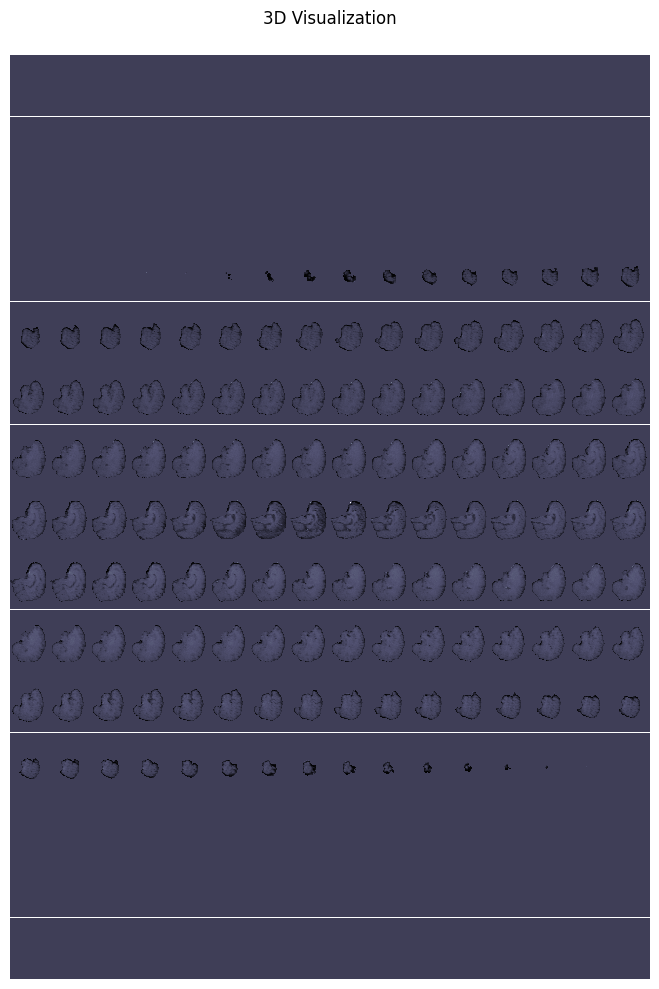

In [226]:
# 加载 NIfTI 文件
# 使用 matshow3d 可视化 3D 数据
matshow3d(data, cmap='bone', title='3D Visualization')

In [228]:
import itk
import vtk

# 加载 NIfTI 文件
image = data

# 将 ITK 图像转换为 VTK 图像
vtk_image = itk.vtk_image_from_image(image)

# 创建 VTK 渲染器和窗口
renderer = vtk.vtkRenderer()
render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)

# 创建 VTK 交互器
interactor = vtk.vtkRenderWindowInteractor()
interactor.SetRenderWindow(render_window)

# 创建 VTK 体积渲染器
volume_mapper = vtk.vtkSmartVolumeMapper()
volume_mapper.SetInputData(vtk_image)

volume_property = vtk.vtkVolumeProperty()
volume = vtk.vtkVolume()
volume.SetMapper(volume_mapper)
volume.SetProperty(volume_property)

# 将体积添加到渲染器
renderer.AddVolume(volume)

# 启动交互器
interactor.Initialize()
render_window.Render()
interactor.Start()

ImportError: cannot import name 'VolumeRenderer' from 'monai.visualize' (/root/miniconda3/envs/cv/lib/python3.10/site-packages/monai/visualize/__init__.py)

In [ ]:
# def get_paths_dict(patient_dir):
#     paths_dict = {}
#     filenames = os.listdir(patient_dir)
#     for filename in filenames:
#         modal = filename.split('.')[0].split('_')[-1]
#         path = os.path.join(patient_dir, filename)
#         paths_dict[modal] = path
#     return paths_dict

# def get_data_dict(paths_dict):
#     data_dict = {}
#     for (modal, path) in paths_dict.items(): 
#         data_ndarray = nib.load(path).get_fdata()
#         data_dict[modal] = data_ndarray
#     return data_dict

# def get_slice_dict(data_dict, slice_num):
#     sub_areas = ['ET', 'TC', 'WT']
#     slices = {}
#     subarea_slice_mask = {}
#     subarea_slice_pred = {}
#     slices['original'] = data_dict['t1'][:,:, slice_num]
#     slices['mask'] = data_dict['mask'][:,:, slice_num]
#     slices['pred'] = data_dict['pred'][:,:, slice_num]
    
#     for label, sub_area in enumerate(sub_areas):
#         subarea_slice_mask[f'{sub_area} on Mask'] = np.where(slices['mask']==label+1, label+1, 0)
#         subarea_slice_pred[f'{sub_area} on Pred'] = np.where(slices['mask']==label+1, label+1, 0)
#     return slices, subarea_slice_mask, subarea_slice_pred

# def show_mapped_slice_mask_to_data(slices, addition):
#     fig, axs = plt.subplots(1, 2, figsize=(20, 10))
#     axs[0].imshow(slices['original'], cmap='bone')
#     axs[0].imshow(np.ma.masked_where(slices['mask'] == False, slices['mask']), cmap='cool', alpha=0.5, animated=True)
#     axs[0].set_title(f'Groud Truth', fontsize=30)
#     axs[0].legend()
#     axs[0].axis('off')   
    
#     axs[1].imshow(slices['original'], cmap='bone')
#     axs[1].imshow(np.ma.masked_where(slices['pred'] == False, slices['pred']), cmap='cool', alpha=0.5, animated=True)
#     axs[1].set_title(f'Prediction on {addition}', fontsize=30)
#     axs[1].legend()
#     axs[1].axis('off')
#     plt.tight_layout()
#     plt.show()

# def show_slice_dict(single_slices, mask_slice_dict, cmap='bone', addition='UNet'):
#     fig, axs = plt.subplots(1, len(mask_slice_dict), figsize=(10*len(mask_slice_dict), 10))
#     for i, (title, mask_slice) in enumerate(mask_slice_dict.items()):
#         axs[i].imshow(single_slices['original'], cmap='bone')
#         axs[i].imshow(np.ma.masked_where(mask_slice == False, mask_slice),
#            cmap='magma', alpha=1, animated=True)
#         axs[i].set_title(f'{addition}: {title}', fontsize=20)
#         axs[i].legend()
#         axs[i].axis('off')
#     plt.tight_layout()
#     plt.show()

In [ ]:
            # mapped_data_dict[f'pred_{modal}'] = np
            # mapped_data_dict[f'pred_{modal}'] = np.where(data_dict['pred'] == 0, data_dict[modal], data_dict['pred'])
            # pred_condition_1 = (data_dict['pred'] != 0) & (data_dict['pred'] != 2) & (data_dict['pred'] != 3) 
            # pred_condition_2 = (data_dict['pred'] != 0) & (data_dict['pred'] != 1) & (data_dict['pred'] != 3) 
            # pred_condition_3 = (data_dict['pred'] != 0) & (data_dict['pred'] != 1) & (data_dict['pred'] != 2) 
            # mask_condition_1 = (data_dict['mask'] != 0) & (data_dict['mask'] != 2) & (data_dict['mask'] != 3) 
            # mask_condition_2 = (data_dict['mask'] != 0) & (data_dict['mask'] != 1) & (data_dict['mask'] != 3) 
            # mask_condition_3 = (data_dict['mask'] != 0) & (data_dict['mask'] != 1) & (data_dict['mask'] != 2) 
            # mapped_pred_data_dict[f'pred_{modal}_1'] = np.ma.masked_where(pred_condition_1, empty_ndarray) # 在empty_ndarray用掩膜标出非零区域
            # mapped_pred_data_dict[f'pred_{modal}_2'] = np.ma.masked_where(pred_condition_2, empty_ndarray)
            # mapped_pred_data_dict[f'pred_{modal}_3'] = np.ma.masked_where(pred_condition_3, empty_ndarray)
            # mapped_masked_data_dict[f'mask_{modal}_1'] = np.ma.masked_where(mask_condition_1, empty_ndarray) # 在empty_ndarray用掩膜标出非零区域
            # mapped_masked_data_dict[f'mask_{modal}_2'] = np.ma.masked_where(mask_condition_2, empty_ndarray)
            # mapped_masked_data_dict[f'mask_{modal}_3'] = np.ma.masked_where(mask_condition_3, empty_ndarray)        
            # mask = np.where((data_dict['pred'] != 0), 0, 1)            
            # mask = np.ma.masked_where(data_dict[modal]!=0, mask)  # 在empty_ndarray用掩膜标出非零区域